# PC5228 Analysis

In this file I will do the analysis of the extended results of Mach-Zehnder interferometer-like Quantum circuit from `PC5228_data_generation_extended.ipynb`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import qiskit

First, let us plot the counts.

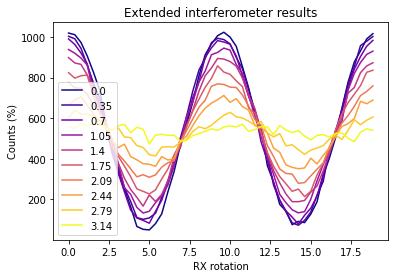

In [22]:
phase_steps = 50
rot_steps = 10
phases = np.linspace(0, 6*np.pi, num=phase_steps)
rots = np.linspace(0, np.pi, num=rot_steps)

cmap = matplotlib.cm.get_cmap('plasma')
data = np.ndarray((rot_steps, phase_steps, 2))

for i in range(rot_steps):
    data[i,:,:] = np.loadtxt('data_extended//data_{}.txt'.format(i))
    rot = rots[i]
    rgba = cmap(rot/np.pi)
    plt.plot(phases, data[i,:,0], color=rgba, label=round(rot,2))
    
plt.title('Extended interferometer results')
plt.xlabel('RX rotation')
plt.ylabel('Counts (%)')
plt.legend(loc='best')
plt.show()

Here we can see that the interference grows weaker as the RX rotation becomes larger. Now let us turn our attention to the interferometric visibility again.

$$
\nu = \frac{I_{max} - I_{min}}{I_{max} + I_{min}}
$$

For a Mach-Zehnder interferometer, this value should ideally be 1 as $I_{min} = 0$ and $I_{max} = 1$. For our extended interferometer though, the expression will also depend on the RX rotation.

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

$$
\nu(\phi) = \left| \braket{\psi}{RX(\phi)|\psi}\right| = \cos\left(\frac{\phi}{2}\right)
$$

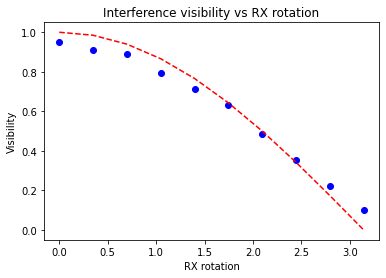

In [20]:
def visibility(counts):
    max_counts = max(counts)
    min_counts = min(counts)
    return (max_counts - min_counts) / (max_counts + min_counts)

vis = np.ndarray((rot_steps))
for i in range(rot_steps):
    rot = rots[i]
    vis[i] = 0.5 * visibility(data[i,:,0]) + 0.5 * visibility(data[i,:,1])

plt.plot(rots, vis, 'bo')
plt.plot(rots, np.cos(rots/2), 'r--')
plt.xlabel('RX rotation')
plt.ylabel('Visibility')
plt.title('Interference visibility vs RX rotation')
plt.show()